In [1]:
# Load image

# Reshape image to 2D array of pixels (each pixel = [R, G, B])

# Choose number of clusters (k)

# Initialize k cluster centers randomly

# Repeat until convergence or max iterations:
    # Assign each pixel to the nearest cluster center
    # Update cluster centers as the mean of assigned pixels

# Replace each pixel with its cluster center color

# Reshape back to original image shape and display/save result

In [2]:
%pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import PILToTensor, ToTensor
from torchvision.datasets import VOCSegmentation
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

class ToTensorPair:
    def __call__(self, image, target):
        image = ToTensor()(image)
        target = torch.from_numpy(np.array(target)).long()
        return image, target
    
data_root =  '"wsl.localhost/Ubuntu/home/sriramadhenu/vscode/ECS 171/final_dataset"'
transform = ToTensorPair()
train_dataset = VOCSegmentation(
    root=data_root,
    year="2012",
    image_set="train",
    download=True, 
    transforms=transform
)
val_dataset = VOCSegmentation(
    root=data_root,
    year="2012",
    image_set="val",
    download=True, 
    transforms=transform
)
BATCH_SIZE = 8
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0
)
val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)
print("Data Loaded")

Data Loaded


In [4]:
image, mask = train_dataset[2]
print("Image shape:", image.shape) 
print("Mask shape:", mask.shape) 

Image shape: torch.Size([3, 375, 500])
Mask shape: torch.Size([375, 500])


In [5]:
image_perumated = image.permute(1, 2, 0)
print("Image shape:", image_perumated)

Image shape: tensor([[[0.6745, 0.6039, 0.5647],
         [1.0000, 0.9725, 0.9373],
         [1.0000, 0.9647, 0.9569],
         ...,
         [1.0000, 1.0000, 0.9647],
         [0.9294, 0.9176, 0.8824],
         [0.8392, 0.8275, 0.7922]],

        [[0.4824, 0.4118, 0.3725],
         [1.0000, 0.9765, 0.9412],
         [0.9843, 0.9569, 0.9333],
         ...,
         [1.0000, 0.9882, 0.9608],
         [1.0000, 0.9961, 0.9686],
         [0.9686, 0.9569, 0.9294]],

        [[0.2118, 0.1490, 0.0980],
         [1.0000, 0.9922, 0.9451],
         [0.9804, 0.9686, 0.9333],
         ...,
         [0.9725, 0.9686, 0.9529],
         [0.9725, 0.9686, 0.9529],
         [0.9961, 0.9922, 0.9765]],

        ...,

        [[0.2510, 0.3098, 0.3373],
         [0.2392, 0.2902, 0.3137],
         [0.4078, 0.4431, 0.4627],
         ...,
         [0.3686, 0.4118, 0.4275],
         [0.3529, 0.3882, 0.4078],
         [0.3255, 0.3608, 0.3804]],

        [[0.2706, 0.3373, 0.3647],
         [0.2667, 0.3255, 0.3451],

In [6]:
image_reshaped = image_perumated.reshape(-1, 3)
print("Image:", image_reshaped)
print("Image shape:", image_reshaped.shape)

Image: tensor([[0.6745, 0.6039, 0.5647],
        [1.0000, 0.9725, 0.9373],
        [1.0000, 0.9647, 0.9569],
        ...,
        [0.2471, 0.2941, 0.2941],
        [0.3490, 0.3961, 0.3961],
        [0.2118, 0.2588, 0.2588]])
Image shape: torch.Size([187500, 3])


In [7]:
image_pixels = np.float32(image_reshaped)
print(image_pixels)

classes = 21 #number of classes + background
num_pixels = len(image_pixels)
indices = np.random.choice(num_pixels, classes, replace=False)
centers = image_pixels[indices]
print(centers)

[[0.6745098  0.6039216  0.5647059 ]
 [1.         0.972549   0.9372549 ]
 [1.         0.9647059  0.95686275]
 ...
 [0.24705882 0.29411766 0.29411766]
 [0.34901962 0.39607844 0.39607844]
 [0.21176471 0.25882354 0.25882354]]
[[0.43529412 0.42352942 0.40392157]
 [0.93333334 0.9372549  0.8745098 ]
 [0.49019608 0.45490196 0.43529412]
 [0.43529412 0.5137255  0.5176471 ]
 [0.07058824 0.08235294 0.05490196]
 [0.45882353 0.43137255 0.40784314]
 [0.79607844 0.8901961  0.8980392 ]
 [0.7529412  0.7254902  0.69411767]
 [1.         0.99607843 0.9607843 ]
 [0.9882353  0.99215686 0.9607843 ]
 [0.5019608  0.50980395 0.49019608]
 [0.08627451 0.14901961 0.10980392]
 [0.42352942 0.5058824  0.5254902 ]
 [0.10980392 0.17254902 0.13333334]
 [0.01960784 0.04705882 0.01960784]
 [0.3254902  0.3372549  0.30980393]
 [0.31764707 0.31764707 0.31764707]
 [0.10980392 0.14509805 0.1254902 ]
 [0.41960785 0.4        0.3764706 ]
 [0.44313726 0.44705883 0.41568628]
 [0.22745098 0.21176471 0.20784314]]


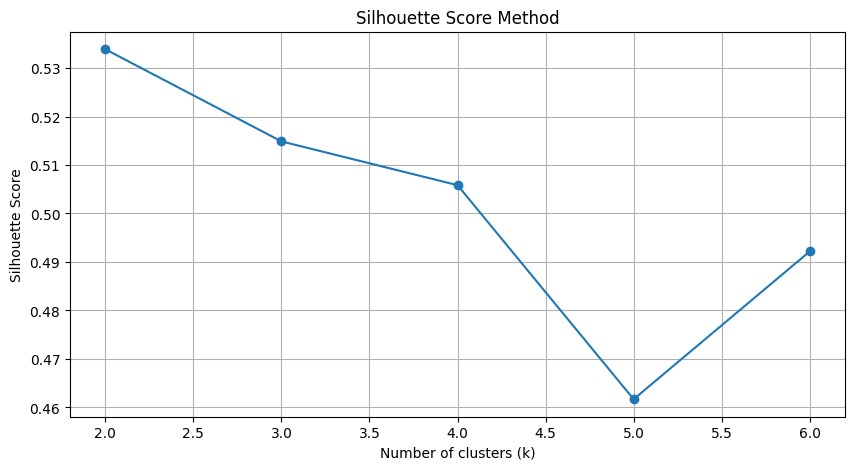

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
pixel_scaled = scaler.fit_transform(image_pixels)

# Sample pixels for faster computation - larger sample size
sample_size = min(50000, len(pixel_scaled))  # Use at most 50,000 pixels
indices = np.random.choice(len(pixel_scaled), sample_size, replace=False)
pixel_sample = pixel_scaled[indices]

silhouette_scores = []
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(pixel_sample)
    score = silhouette_score(pixel_sample, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [9]:
from sklearn.cluster import KMeans
MAX_ITERATIONS = 100

def kmeans(pixels, k):
    num_pixels = len(pixels)
    indices = np.random.choice(num_pixels, k, replace=False)
    centroids = pixels[indices].copy()
    
    iterations = 0
    old_centroids = None
    
    while not stop(old_centroids, centroids, iterations):
        old_centroids = centroids.copy()
        iterations += 1
        labels = get_labels(pixels, centroids)
        centroids = get_centroids(pixels, labels, k, centroids)
        
    return centroids, labels

def stop(old_centroids, centroids, iterations):
    if iterations > MAX_ITERATIONS:
        return True
    if old_centroids is None:
        return False
    return np.allclose(old_centroids, centroids, rtol=1e-4)

def get_labels(pixels, centroids):
    distances = np.sqrt(((pixels[:, np.newaxis] - centroids) ** 2).sum(axis=2))
    return np.argmin(distances, axis=1)
        
def get_centroids(pixels, labels, k, old_centroids):
    centroids = []
    for i in range(k):
        if np.any(labels == i):
            centroid = np.mean(pixels[labels == i], axis=0)
        else:
            centroid = old_centroids[i]
        centroids.append(centroid)
    return np.array(centroids)

def get_distance(pixel, centroid):
    return np.sqrt(np.sum((pixel - centroid) ** 2))

In [10]:
best_k = range(2, 7)[np.argmax(silhouette_scores)]
print(f"k = {best_k}")
cluster_centers, labels = kmeans(image_pixels, best_k)

k = 2


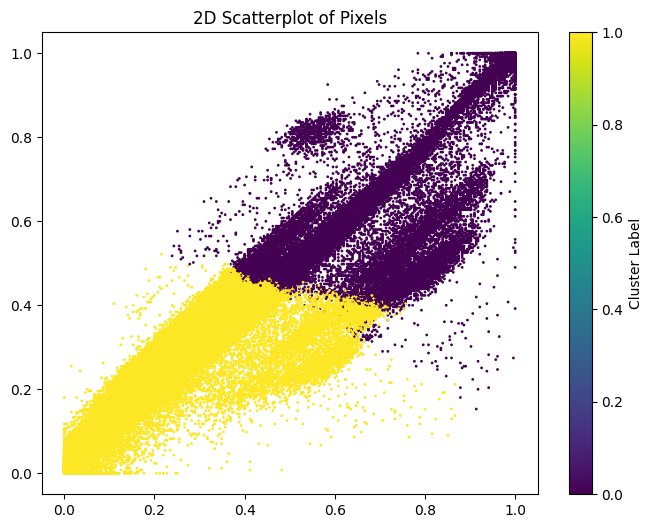

In [11]:
#make the visualizations for the clusters
plt.figure(figsize=(8, 6))
plt.scatter(image_pixels[:, 0], image_pixels[:, 1], c=labels, cmap='viridis', s=1)
plt.title("2D Scatterplot of Pixels")
plt.colorbar(label="Cluster Label")
plt.show()

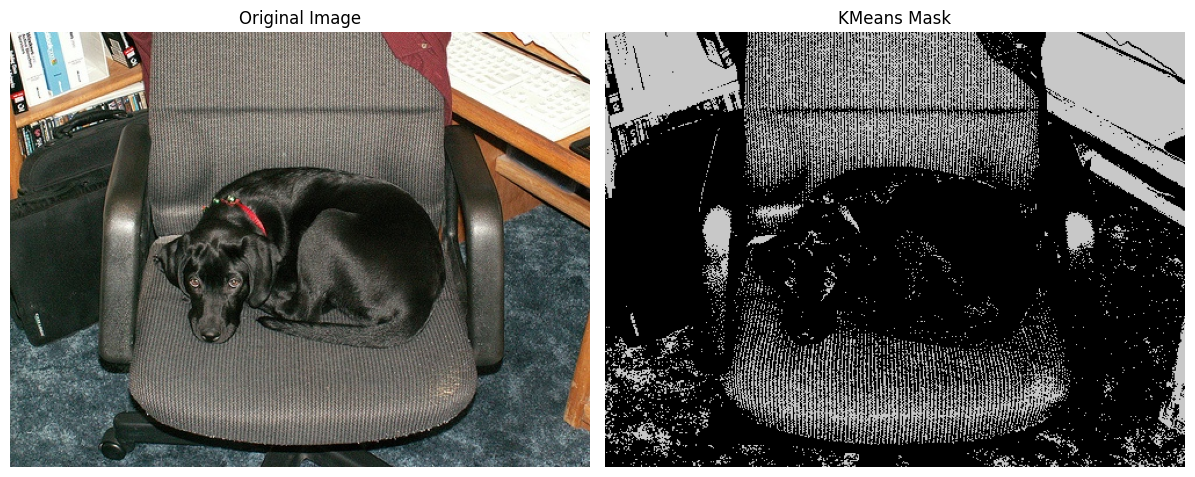

In [12]:
import matplotlib.pyplot as plt
import numpy as np

h, w = image_perumated.shape[:2]
segmented_mask = labels.reshape(h, w)

colormap = np.array([
    [200, 200, 200],     
    [0, 0, 0],
], dtype=np.uint8)

colored_mask = colormap[segmented_mask]

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_perumated)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("KMeans Mask")
plt.imshow(colored_mask)
plt.axis('off')

plt.tight_layout()
plt.show()

Automatically selected k = 4


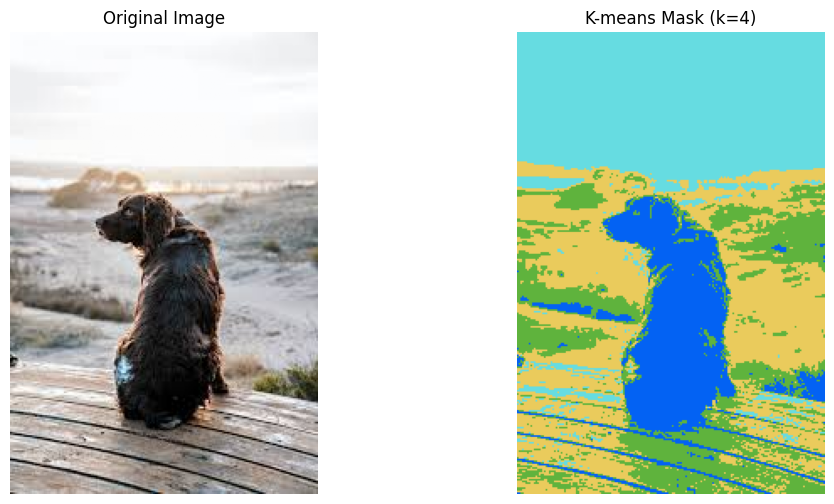

In [14]:
def predict_kmeans_mask(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = ToTensor()(image)
    image_perumated = image_tensor.permute(1, 2, 0)
    image_reshaped = image_perumated.reshape(-1, 3)
    image_pixels = np.float32(image_reshaped)
    
    scaler = MinMaxScaler()
    pixel_scaled = scaler.fit_transform(image_pixels)
    
    sample_size = min(50000, len(pixel_scaled))
    indices = np.random.choice(len(pixel_scaled), sample_size, replace=False)
    pixel_sample = pixel_scaled[indices]
    
    silhouette_scores = []
    for k_test in range(2, 7):
        kmeans_test = KMeans(n_clusters=k_test, random_state=0, n_init=10)
        labels_test = kmeans_test.fit_predict(pixel_sample)
        score = silhouette_score(pixel_sample, labels_test)
        silhouette_scores.append(score)
    
    k = range(2, 7)[np.argmax(silhouette_scores)]
    
    cluster_centers, labels = kmeans(image_pixels, k)
    
    h, w = image_perumated.shape[:2]
    segmented_mask = labels.reshape(h, w)
    
    np.random.seed(42)
    colormap = np.random.randint(0, 256, size=(k, 3), dtype=np.uint8)
    colored_mask = colormap[segmented_mask]
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image_perumated)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title(f"K-means Mask (k={k})")
    plt.imshow(colored_mask)
    plt.axis('off')
    plt.show()
    
    return segmented_mask, colored_mask

try:
    image_path = image_path = "/home/sriramadhenu/vscode/ECS 171/subject-isolation/test.jpg"
    mask, colored_mask = predict_kmeans_mask(image_path)
except Exception as e:
    print(f"Could not load image for prediction: {e}")
    print("Please provide a valid image path.")